In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_multiple_countries

In [2]:
ASEAN_COUNTRIES = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia', 'Vietnam', 'Cambodia', 'Philippines', 'Brunei']
df = load_multiple_countries(ASEAN_COUNTRIES)

LAST_DAYS = 30
Y_SIZE = 500

annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nbryan.blackbee', 
    xy=(0.05, 0.00), xycoords='figure fraction', fontsize=10)

In [3]:
display(df)

,country,date,total,new,deaths,discharged,active
0,Singapore,2020-01-22,0,0,0,0,0
1,Singapore,2020-01-23,1,1,0,0,1
2,Singapore,2020-01-24,3,2,0,0,3
3,Singapore,2020-01-25,3,0,0,0,3
4,Singapore,2020-01-26,4,1,0,0,4
...,...,...,...,...,...,...,...
683,Brunei,2020-04-12,136,0,1,106,29
684,Brunei,2020-04-13,136,0,1,107,28
685,Brunei,2020-04-14,136,0,1,107,28
686,Brunei,2020-04-15,136,0,1,108,27


In [4]:
# 2nd graph, used for highlighting WHO declaring pandaemic
x = np.arange(df.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

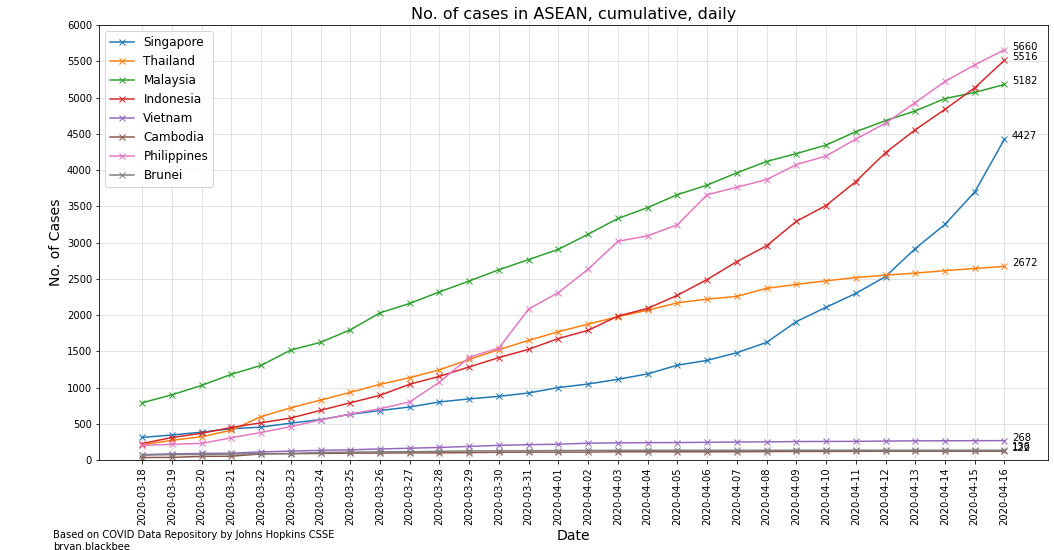

In [5]:
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)

# Used for determination of values of axes
countries = []
todayscases = []

# Plot
for c in ASEAN_COUNTRIES:
    # Plot
    df_d = df[df.country==c].copy()
    df_d.tail(LAST_DAYS).plot(kind='line', x='date', y='total', ax=ax, marker='x', linewidth=1.5)
    # Collect data
    countries.append(c)
    todayscases.append(df_d['total'].tail(1).tolist()[0])

# x-axis
ax.set_xticks(range(LAST_DAYS))
ax.set_xticklabels(df['date'].tail(LAST_DAYS), rotation=90)
ax.set_xlabel("Date", fontsize=14)

# y-axis
todayscases_max = max(todayscases)
ylim_max = (todayscases_max//Y_SIZE + 1)*Y_SIZE
ax.set_ylim(0, ylim_max)
ax.set_yticks(range(0,ylim_max+1,Y_SIZE))
ax.set_ylabel("No. of Cases", fontsize=14)

# features of graph
ax.grid(color='GAINSBORO')
ax.legend(countries, fontsize=12)

# no. of cases annotation
for i, v in enumerate(todayscases):
    ax.text(df_d.tail(LAST_DAYS).shape[0]-0.75, v, str(v), fontsize=10)

# title
ax.set_title("No. of cases in ASEAN, cumulative, daily", fontsize=16)

# WHO Declares Pandemic
df_t = df.tail(LAST_DAYS).copy()
_ = df_t.reset_index(inplace=True, drop=True)

ax.annotate(**annotate_kwargs)

plt.show()

In [6]:
pivot_raw = df[(df.country.isin(ASEAN_COUNTRIES)) & (df.date.isin(df['date'].unique()[-int(LAST_DAYS/3):]))][['country', 'date', 'total']]
pivot_raw = pivot_raw.copy()
pd.pivot_table(pivot_raw, columns=['date'], index='country')

total                                                         \
date        2020-04-07 2020-04-08 2020-04-09 2020-04-10 2020-04-11 2020-04-12   
country                                                                         
Brunei             135        135        135        136        136        136   
Cambodia           115        117        119        119        120        122   
Indonesia         2738       2956       3293       3512       3842       4241   
Malaysia          3963       4119       4228       4346       4530       4683   
Philippines       3764       3870       4076       4195       4428       4648   
Singapore         1481       1623       1910       2108       2299       2532   
Thailand          2258       2369       2423       2473       2518       2551   
Vietnam            249        251        255        257        258        262   

                                                         
date        2020-04-13 2020-04-14 2020-04-15 2020-04-16  
country                                                  
Brunei             136        136        136        136  
Cambodia           122        122        122        122  
Indonesia         4557       4839       5136       5516  
Malaysia          4817       4987       5072       5182  
Philippines       4932       5223       5453       5660  
Singapore         2918       3252       3699       4427  
Thailand          2579       2613       2643       2672  
Vietnam            265        266        267        268

Sources: 

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)